
##(Simple Linear Regression)

## Que 1) Delivery_time -> Predict delivery time using sorting time 

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Importing Data

In [ ]:
delivery_data = pd.read_csv('/content/delivery_time.csv')
delivery_data.head(6)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6


## Data understanding

In [ ]:
delivery_data.shape

(21, 2)

In [ ]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [ ]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Check for the assumption compatibility

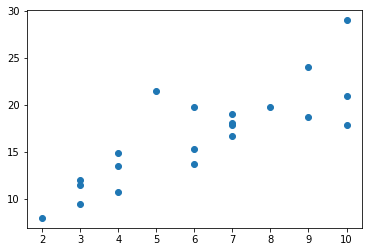

In [ ]:
plt.scatter(x='Sorting Time',y='Delivery Time', data=delivery_data)

In [ ]:
delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


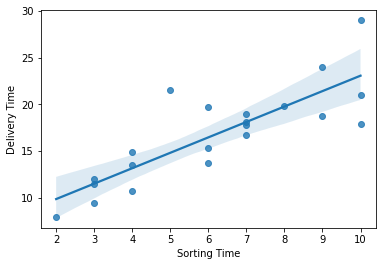

In [ ]:
sns.regplot(x='Sorting Time',y='Delivery Time', data=delivery_data)

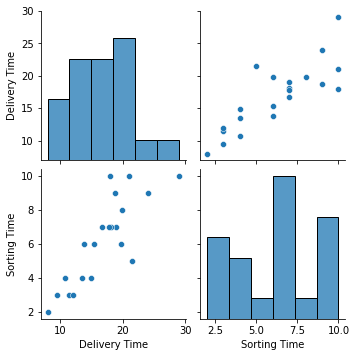

In [ ]:
sns.pairplot(delivery_data)

## Data Preparation

In [ ]:
delivery_data.head(6)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6


In [ ]:
delivery_data=delivery_data.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}) 
delivery_data.head(6)

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6


## Model Building and  Model Training

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
linear_model_Delivery = smf.ols(formula= 'Delivery_Time~Sorting_Time',data=delivery_data).fit()

## Check for the Deliverables

In [ ]:
linear_model_Delivery.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

# strength of a hypothesis

In [ ]:
linear_model_Delivery.tvalues,linear_model_Delivery.pvalues 

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64, Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

### As P value is much lesser than alpha (0.05) we can say there is good co-realtion between variables

## Model Testing

In [ ]:
# If Sorting_Time = 4 , 15 then =?
# Y = mX + C
print(1.649020*4+6.582734)
print(1.649020*15+6.582734)

13.178814
31.318033999999997


## Machine Prediction

In [ ]:
pred_data = {'Sorting_Time':[4,15,6,8,12]}
pred_data

{'Sorting_Time': [4, 15, 6, 8, 12]}

In [ ]:
test_data = pd.DataFrame(pred_data)
test_data

,Sorting_Time
0,4
1,15
2,6
3,8
4,12


In [ ]:
linear_model_Delivery.predict(test_data)

0    13.178814
1    31.318032
2    16.476853
3    19.774893
4    26.370973
dtype: float64

In [ ]:
test_data_a = pd.DataFrame(delivery_data,columns=['Sorting_Time'])
test_data_a.head(6)

,Sorting_Time
0,10
1,4
2,6
3,9
4,10
5,6


In [ ]:
linear_model_Delivery.predict(test_data_a)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

## Model Deployment

In [ ]:
from pickle import dump

In [ ]:
dump(linear_model_Delivery, open('linear_model_Delivery.pkl','wb'))

In [ ]:
from pickle import load

In [ ]:
linear_read_model = load(open('/content/linear_model_Delivery.pkl','rb'))

In [ ]:
linear_read_model.predict(test_data)

0    13.178814
1    31.318032
2    16.476853
3    19.774893
4    26.370973
dtype: float64